# Extract CESM SSP

Notebook to extact variables on a specified domain from a CESM WACCM SSP 

### Imports

In [1]:
#Import something here
import xarray as xr
import matplotlib.pyplot as plt

### Data Ingest

In [2]:
archive_dir = '/glade/campaign/collections/cmip/CMIP6/timeseries-cmip6/'
casename = 'b.e21.BWSSP370cmip6.f09_g17.CMIP6-SSP3-7.0-WACCM.001'
monthly = '/atm/proc/tseries/month_1/'
date_range = '.201501-206412.nc'

domain boundaries are:
Lon -10.25 to 19
Lat 35 to 60
 
I’m hoping to use 2006 to 2014 for my historic simulations. For the future, I’m planning to run:
 
2046-2054 from SSP1-2.6, SSP2-4.5, SSP3-7.0

In [37]:
datashare = '/glade/p/datashare/marsh/waccm_cmip6/'
outdir = 'SSP3-7.0-WACCM.001/'

lat_min = 33.
lat_max = 62.
lon_min = -12.
lon_max = 21.

out_start = "2015-02-01"
out_stop =  "2015-03-01"


In [4]:
species_list = '../notes/waccm_species_to_select.txt'

file1 = open(species_list, 'r')

for species in file1:
    ncfile = archive_dir+casename+monthly+casename+'.cam.h0.'+species.strip()+date_range
    print(species.strip())
    
file1.close()

BENZENE
BIGALK
BIGENE
C2H4
C2H5OH
C2H6
C3H6
C3H8
CH3COCH3
CH3OH
CH3OOH
CH4
CO
CRESOL
DMS
H2O2
HNO3
HO2NO2
HYAC
MACR
MEK
MPAN
MVK
N2O
N2O5
NH3
NO
NO2
O3
PAN
SO2
TOLUENE
bc_a1
bc_a4
dst_a1
dst_a2
dst_a3
ncl_a1
ncl_a2
ncl_a3
num_a1
num_a2
num_a3
pom_a1
so4_a1
so4_a2
so4_a3
soa1_a1
soa1_a2
soa2_a1
soa2_a2
soa3_a1
soa3_a2
soa4_a1
soa4_a2
soa5_a1
soa5_a2


In [14]:
ds = xr.open_dataset('../data/test.nc')

In [15]:
ds = ds.roll(lon=144, roll_coords=True)
lon = ds['lon']
ds['lon'] = xr.where(lon >= 180, lon-360, lon)

In [36]:
ds0 = ds.sel(time=slice(out_start, out_stop), \
             lat=slice(lat_min, lat_max), \
             lon=slice(lon_min, lon_max))

TypeError: '{'2015-02-01', '2015-03-01'}' is an invalid key

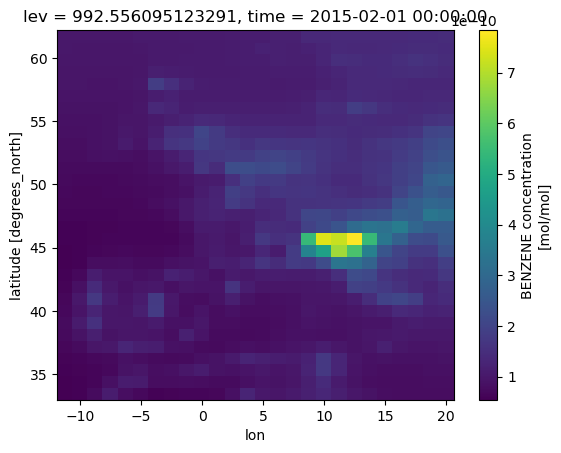

In [29]:
ds0.BENZENE.isel(time=0,lev=69).plot()
plt.show()

In [32]:
ds0

<xarray.Dataset>
Dimensions:       (time: 2, lev: 70, lat: 31, lon: 26, ilev: 71, nbnd: 2, zlon: 1)
Coordinates:
  * ilev          (ilev) float64 4.5e-06 7.42e-06 1.223e-05 ... 985.1 1e+03
  * lat           (lat) float64 33.46 34.4 35.34 36.28 ... 59.84 60.79 61.73
  * lev           (lev) float64 5.96e-06 9.827e-06 1.62e-05 ... 976.3 992.6
  * lon           (lon) float64 -11.25 -10.0 -8.75 -7.5 ... 17.5 18.75 20.0
  * time          (time) object 2015-02-01 00:00:00 2015-03-01 00:00:00
  * zlon          (zlon) float64 0.0
Dimensions without coordinates: nbnd
Data variables: (12/27)
    BENZENE       (time, lev, lat, lon) float32 3.708e-37 ... 1.869e-10
    P0            float64 1e+05
    ch4vmr        (time) float64 1.843e-06 1.842e-06
    co2vmr        (time) float64 0.0004002 0.0004006
    date          (time) float64 2.015e+07 2.015e+07
    date_written  (time) object b'03/02/19' b'03/02/19'
    ...            ...
    nscur         (time) float64 0.0 0.0
    nsteph        (time) float64 1.488e+03 2.832e+03
    sol_tsi       (time) float64 -1.0 -1.0
    time_bnds     (time, nbnd) object 2015-01-01 00:00:00 ... 2015-03-01 00:0...
    time_written  (time) object b'13:55:25' b'14:22:31'
    zlon_bnds     (zlon, nbnd) float64 0.0 358.8
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BWSSP370cmip6.f09_g17.CMIP6-SSP3-7.0-WACCM.001
    logname:           cmip6
    host:              cheyenne2
    initial_file:      b.e21.BWHIST.f09_g17.CMIP6-historical-WACCM.001.cam.i....
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Tue Feb 15 12:17:25 2022: ncks -d time,0,2 /glade/camp...
    NCO:               netCDF Operators version 4.9.5 (Homepage = http://nco....